# 603 Final Project

### Team Members:
   #### Lavanya Mamillapalli ( QW21097)
   #### Bhaavani Madabathula 
   #### Leela Manikanta Cheekatla (JX33255)

### Data:
   http://data.torontopolice.on.ca/pages/open-data/Major_Crime_Indicators_Open_Data.csv

### Objective:
    The following project is a Multi-class classification model for predicting the types of crimes in Toronto city. Here, using big data, we has constructed a five-class classification model using a Logistic Regression classifier to predict the type of major crime committed based on time of day, neighborhood, division, year, month, etc. using data sourced from Toronto Police.

    The use of big data analytics here is to discover crime tendencies automatically. If analysts are given automated, data-driven tools to discover crime patterns, these tools can help police better comprehend crime patterns, allowing for more precise estimates of past crimes and increasing suspicion of suspects.

### Basic Analysis

### Importing Required Libraries

In [1]:
#imported all required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import full data set
df = pd.read_csv(r"C:\Users\lavan\Downloads\Major_Crime_Indicators_Open_Data.csv",sep=',') 
df

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.425896,43.757346,1,GO-20141262074,2014/01/01 05:00:00+00,1998/06/01 04:00:00+00,2014,January,1,1,...,1480,110,Administering Noxious Thing,Assault,38,Lansing-Westgate,38,Lansing-Westgate (38),-79.425896,43.757346
1,-79.350229,43.646293,2,GO-20141260701,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70),-79.350229,43.646293
2,-79.376497,43.666423,3,GO-20141260889,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74),-79.376497,43.666423
3,-85.488744,0.000000,4,GO-20141260973,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA,-85.488744,0.000000
4,-79.344839,43.678946,5,GO-20141261050,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66),-79.344839,43.678946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323291,-79.301740,43.736102,323292,GO-20222554300,2022/12/31 05:00:00+00,2022/12/22 05:00:00+00,2022,December,31,365,...,2120,220,B&E W'Intent,Break and Enter,119,Wexford/Maryvale,119,Wexford/Maryvale (119),-79.301740,43.736102
323292,-79.258639,43.828794,323293,GO-20222557893,2022/12/31 05:00:00+00,2022/12/31 05:00:00+00,2022,December,31,365,...,2120,200,B&E,Break and Enter,130,Milliken,130,Milliken (130),-79.258639,43.828794
323293,-79.425645,43.701404,323294,GO-20222559486,2022/12/31 05:00:00+00,2022/12/22 05:00:00+00,2022,December,31,365,...,1430,100,Assault,Assault,102,Forest Hill North,102,Forest Hill North (102),-79.425645,43.701404
323294,-79.385170,43.672134,323295,GO-20222557956,2022/12/31 05:00:00+00,2022/12/31 05:00:00+00,2022,December,31,365,...,1430,100,Assault,Assault,98,Rosedale-Moore Park,98,Rosedale-Moore Park (98),-79.385170,43.672134


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323296 entries, 0 to 323295
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  323296 non-null  float64
 1   Y                  323296 non-null  float64
 2   OBJECTID           323296 non-null  int64  
 3   EVENT_UNIQUE_ID    323296 non-null  object 
 4   REPORT_DATE        323296 non-null  object 
 5   OCC_DATE           323296 non-null  object 
 6   REPORT_YEAR        323296 non-null  int64  
 7   REPORT_MONTH       323296 non-null  object 
 8   REPORT_DAY         323296 non-null  int64  
 9   REPORT_DOY         323296 non-null  int64  
 10  REPORT_DOW         323296 non-null  object 
 11  REPORT_HOUR        323296 non-null  int64  
 12  OCC_YEAR           323191 non-null  float64
 13  OCC_MONTH          323191 non-null  object 
 14  OCC_DAY            323191 non-null  float64
 15  OCC_DOY            323191 non-null  float64
 16  OC

## Dimensionalities of the dataframe

In [6]:
print("Number of rows ",df.shape[0])
print("Number of Columns ",df.shape[1])

Number of rows  323296
Number of Columns  31


## Histogram of the dataframe

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'OBJECTID'}>,
        <AxesSubplot:title={'center':'REPORT_YEAR'}>],
       [<AxesSubplot:title={'center':'REPORT_DAY'}>,
        <AxesSubplot:title={'center':'REPORT_DOY'}>,
        <AxesSubplot:title={'center':'REPORT_HOUR'}>,
        <AxesSubplot:title={'center':'OCC_YEAR'}>],
       [<AxesSubplot:title={'center':'OCC_DAY'}>,
        <AxesSubplot:title={'center':'OCC_DOY'}>,
        <AxesSubplot:title={'center':'OCC_HOUR'}>,
        <AxesSubplot:title={'center':'UCR_CODE'}>],
       [<AxesSubplot:title={'center':'UCR_EXT'}>,
        <AxesSubplot:title={'center':'LONG_WGS84'}>,
        <AxesSubplot:title={'center':'LAT_WGS84'}>, <AxesSubplot:>]],
      dtype=object)

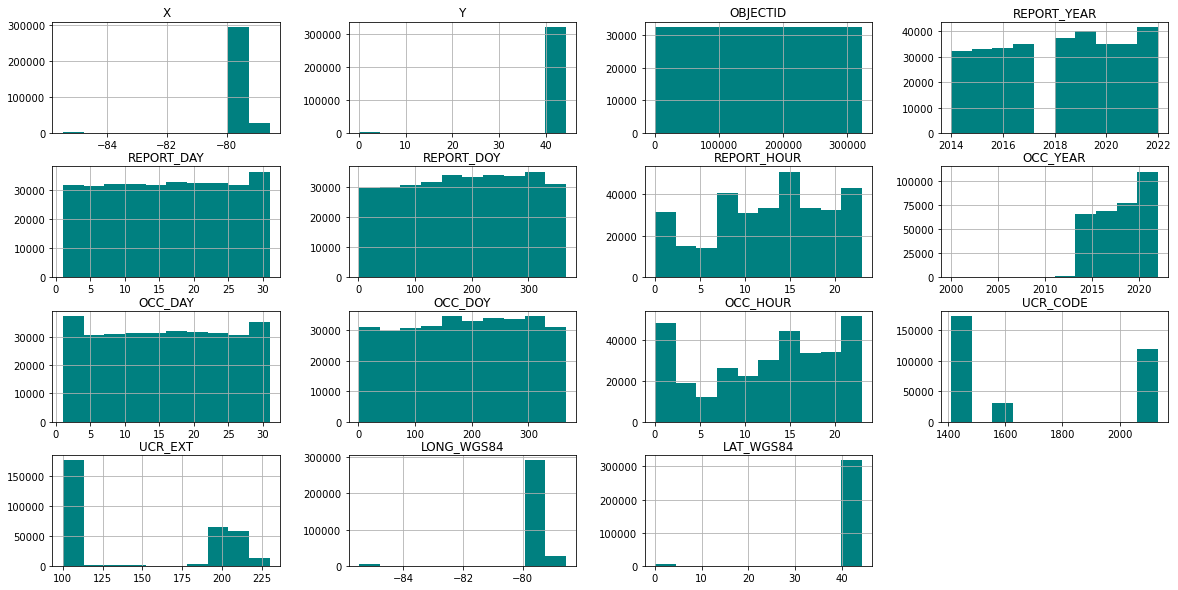

In [7]:
df.hist(color='teal',figsize=(20,10))

<AxesSubplot:>

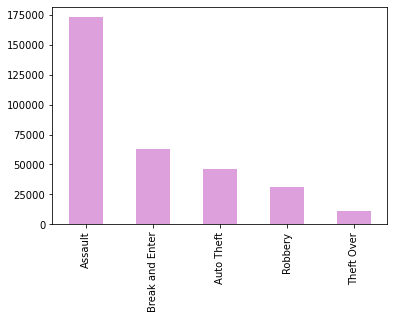

In [8]:
df["MCI_CATEGORY"].value_counts().plot(kind='bar',color='plum')

In [9]:
Top_Crimes =  df["MCI_CATEGORY"].value_counts().sort_values(ascending=False).head(10)
print(Top_Crimes)

Assault            173238
Break and Enter     62527
Auto Theft          46048
Robbery             30738
Theft Over          10745
Name: MCI_CATEGORY, dtype: int64


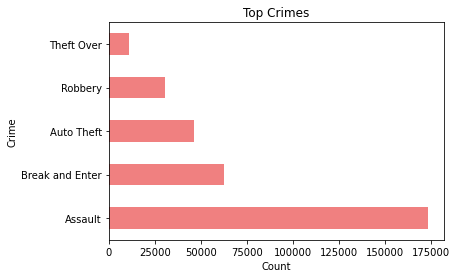

In [10]:
import matplotlib.pyplot as plt

TopCrimes = df.value_counts('MCI_CATEGORY').\
    plot(kind = 'barh',\
         title = "Top Crimes", color='lightcoral'
        )

Top10Crimes.set_xlabel("Count")
Top10Crimes.set_ylabel("Crime")
plt.show()


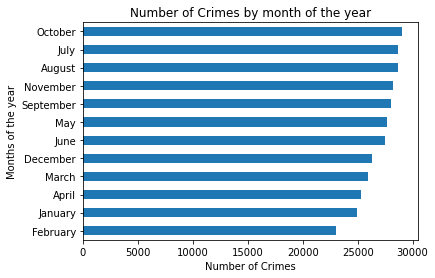

In [11]:
df.groupby([df['REPORT_MONTH']]).size()[:15].sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of Crimes')
plt.title('Number of Crimes by month of the year')
plt.show()

Text(0.5, 1.0, 'Crime per division ')

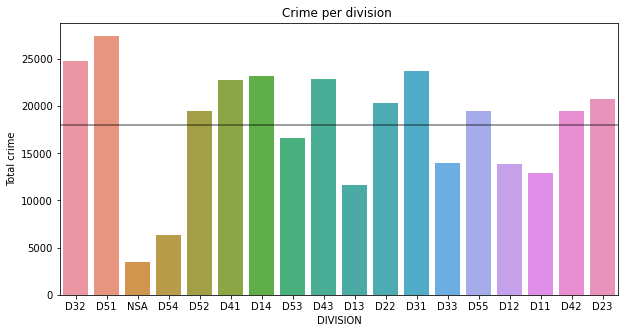

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['DIVISION'])
plt.axhline(df['DIVISION'].value_counts().mean(), color = 'black', alpha = 0.5)
plt.xlabel('DIVISION')
plt.ylabel('Total crime')
plt.title('Crime per division ')

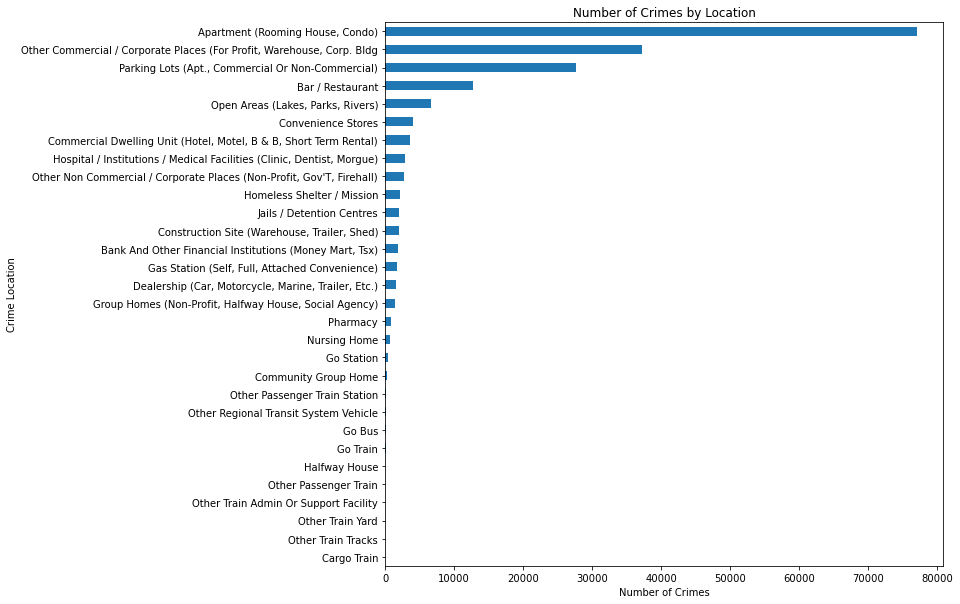

In [71]:
plt.figure(figsize=(10,10))
df.groupby([df['LOCATION_TYPE']]).size()[:30].sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of Crimes')
plt.show()

<AxesSubplot:>

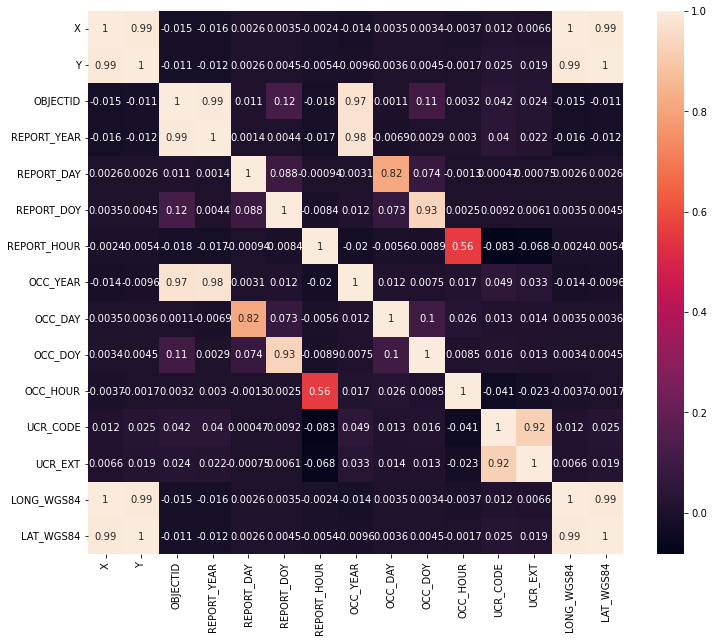

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [13]:
df.describe()

,X,Y,OBJECTID,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,UCR_CODE,UCR_EXT,LONG_WGS84,LAT_WGS84
count,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323191.000000,323191.000000,323191.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000
mean,-79.475536,43.144559,161648.500000,2018.158115,15.744995,187.147781,12.779688,2018.103796,15.456541,186.458639,12.595844,1704.459133,146.771216,-79.475536,43.144559
std,0.694300,4.925584,93327.660651,2.571347,8.769573,103.790065,6.491146,2.610093,8.920467,104.127326,7.254996,327.123233,52.068977,0.694300,4.925584
min,-85.488744,0.000000,1.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,1410.000000,100.000000,-85.488744,0.000000
25%,-79.478939,43.659896,80824.750000,2016.000000,8.000000,99.000000,8.000000,2016.000000,8.000000,98.000000,7.000000,1430.000000,100.000000,-79.478939,43.659896
50%,-79.396397,43.699304,161648.500000,2018.000000,16.000000,190.000000,13.000000,2018.000000,15.000000,189.000000,14.000000,1450.000000,100.000000,-79.396397,43.699304
75%,-79.327244,43.750882,242472.250000,2020.000000,23.000000,277.000000,18.000000,2020.000000,23.000000,276.000000,19.000000,2120.000000,200.000000,-79.327244,43.750882
max,-78.551414,44.351392,323296.000000,2022.000000,31.000000,366.000000,23.000000,2022.000000,31.000000,366.000000,23.000000,2135.000000,230.000000,-78.551414,44.351392


In [14]:
df.isnull().sum()

X                      0
Y                      0
OBJECTID               0
EVENT_UNIQUE_ID        0
REPORT_DATE            0
OCC_DATE               0
REPORT_YEAR            0
REPORT_MONTH           0
REPORT_DAY             0
REPORT_DOY             0
REPORT_DOW             0
REPORT_HOUR            0
OCC_YEAR             105
OCC_MONTH            105
OCC_DAY              105
OCC_DOY              105
OCC_DOW              105
OCC_HOUR               0
DIVISION               0
LOCATION_TYPE          0
PREMISES_TYPE          0
UCR_CODE               0
UCR_EXT                0
OFFENCE                0
MCI_CATEGORY           0
HOOD_158               0
NEIGHBOURHOOD_158      0
HOOD_140               0
NEIGHBOURHOOD_140      0
LONG_WGS84             0
LAT_WGS84              0
dtype: int64

## Working with new dataframe

In [15]:
#list of relevant columns for model
col_list = ['EVENT_UNIQUE_ID','REPORT_DATE','OCC_DATE','OCC_YEAR','OCC_MONTH','OCC_DAY','OCC_DOY','OCC_DOW','OCC_HOUR','MCI_CATEGORY','DIVISION','HOOD_158','HOOD_140','LOCATION_TYPE','PREMISES_TYPE','UCR_CODE','UCR_EXT']

In [16]:
#dataframe created from list of relevant columns
df2 = df[col_list]

In [17]:
#drop "stale" crimes, where occurence is before 2014. 
#Since data set is filtered based on reported date, we're ignoring these old crimes.
df2 = df2[df2['OCC_YEAR'] > 2013]
df2

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,MCI_CATEGORY,DIVISION,HOOD_158,HOOD_140,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT
1,GO-20141260701,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014.0,January,1.0,1.0,Wednesday,3,Break and Enter,D51,70,70,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,2120,200
2,GO-20141260889,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014.0,January,1.0,1.0,Wednesday,4,Assault,D51,74,74,"Apartment (Rooming House, Condo)",Apartment,1430,100
3,GO-20141260973,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014.0,January,1.0,1.0,Wednesday,4,Theft Over,NSA,NSA,NSA,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2130,210
4,GO-20141261050,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014.0,January,1.0,1.0,Wednesday,4,Assault,D54,69,66,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430,100
5,GO-20141259344,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014.0,January,1.0,1.0,Wednesday,2,Assault,D52,164,77,Bar / Restaurant,Commercial,1420,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323291,GO-20222554300,2022/12/31 05:00:00+00,2022/12/22 05:00:00+00,2022.0,December,22.0,356.0,Thursday,8,Break and Enter,D41,119,119,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,220
323292,GO-20222557893,2022/12/31 05:00:00+00,2022/12/31 05:00:00+00,2022.0,December,31.0,365.0,Saturday,3,Break and Enter,D42,130,130,Other Commercial / Corporate Places (For Profi...,Commercial,2120,200
323293,GO-20222559486,2022/12/31 05:00:00+00,2022/12/22 05:00:00+00,2022.0,December,22.0,356.0,Thursday,16,Assault,D53,102,102,"Apartment (Rooming House, Condo)",Apartment,1430,100
323294,GO-20222557956,2022/12/31 05:00:00+00,2022/12/31 05:00:00+00,2022.0,December,31.0,365.0,Saturday,4,Assault,D53,98,98,Convenience Stores,Commercial,1430,100


In [18]:
#df2.REPORT_DATE=pd.to_datetime(df2.REPORT_DATE,format='%Y/%m/%d %H:%M:%S%z')
#df2.OCC_DATE=pd.to_datetime(df2.OCC_DATE,format='%Y/%m/%d %H:%M:%S%z')

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321843 entries, 1 to 323295
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   EVENT_UNIQUE_ID  321843 non-null  object 
 1   REPORT_DATE      321843 non-null  object 
 2   OCC_DATE         321843 non-null  object 
 3   OCC_YEAR         321843 non-null  float64
 4   OCC_MONTH        321843 non-null  object 
 5   OCC_DAY          321843 non-null  float64
 6   OCC_DOY          321843 non-null  float64
 7   OCC_DOW          321843 non-null  object 
 8   OCC_HOUR         321843 non-null  int64  
 9   MCI_CATEGORY     321843 non-null  object 
 10  DIVISION         321843 non-null  object 
 11  HOOD_158         321843 non-null  object 
 12  HOOD_140         321843 non-null  object 
 13  LOCATION_TYPE    321843 non-null  object 
 14  PREMISES_TYPE    321843 non-null  object 
 15  UCR_CODE         321843 non-null  int64  
 16  UCR_EXT          321843 non-null  int6

In [20]:
df2.isnull().sum()

EVENT_UNIQUE_ID    0
REPORT_DATE        0
OCC_DATE           0
OCC_YEAR           0
OCC_MONTH          0
OCC_DAY            0
OCC_DOY            0
OCC_DOW            0
OCC_HOUR           0
MCI_CATEGORY       0
DIVISION           0
HOOD_158           0
HOOD_140           0
LOCATION_TYPE      0
PREMISES_TYPE      0
UCR_CODE           0
UCR_EXT            0
dtype: int64

In [21]:
columns=['MCI_CATEGORY','PREMISES_TYPE','OCC_YEAR','OCC_MONTH','OCC_DAY','OCC_DOW','DIVISION','HOOD_158','HOOD_140','OCC_HOUR','OCC_DOY']
for i in columns:
  print(i, ":" ,df2[i].unique())

MCI_CATEGORY : ['Break and Enter' 'Assault' 'Theft Over' 'Robbery' 'Auto Theft']
PREMISES_TYPE : ['Commercial' 'Apartment' 'Outside' 'Transit' 'House' 'Other'
 'Educational']
OCC_YEAR : [2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022.]
OCC_MONTH : ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
OCC_DAY : [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]
OCC_DOW : ['Wednesday ' 'Thursday  ' 'Friday    ' 'Saturday  ' 'Sunday    '
 'Monday    ' 'Tuesday   ']
DIVISION : ['D51' 'NSA' 'D54' 'D52' 'D41' 'D14' 'D53' 'D43' 'D13' 'D22' 'D31' 'D32'
 'D33' 'D55' 'D12' 'D11' 'D42' 'D23']
HOOD_158 : ['70' '74' 'NSA' '69' '164' '126' '81' '95' '55' '143' '92' '172' '20'
 '136' '107' '27' '36' '170' '48' '61' '85' '72' '54' '94' '68' '154'
 '124' '122' '113' '80' '167' '37' '174' '78' '84' '148' '151' '59' '11'
 '58' '91' '142' '120' '115' '125' '156' '98'

In [22]:
#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI_CATEGORY']) #codes the list of crimes to a int64 variable
df2['MCI_CATEGORY'] = crime_var[0]
definition_list_MCI = crime_var[1] #create an index reference so we know which crimes are coded to which factors
df2['MCI_CATEGORY'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [23]:
#factorize independent variables:
#factorize PREMISES_TYPE:

premise_var = pd.factorize(df2['PREMISES_TYPE'])
df2['PREMISES_TYPE'] = premise_var[0]
definition_list_premise = premise_var[1] 
df2['PREMISES_TYPE'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [24]:
#factorize OCC_YEAR:

year_var = pd.factorize(df2['OCC_YEAR'])
df2['OCC_YEAR'] = year_var[0]
definition_list_year = year_var[1] 
df2['OCC_YEAR'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [25]:
#factorize OCC_MONTH:

month_var = pd.factorize(df2['OCC_MONTH'])
df2['OCC_MONTH'] = month_var[0]
definition_list_month = month_var[1]
df2['OCC_MONTH'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [26]:
#factorize OCC_DAY:

day_var = pd.factorize(df2['OCC_DAY'])
df2['OCC_DAY'] = day_var[0]
definition_list_day = day_var[1] 
df2['OCC_DAY'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype=int64)

In [27]:
#factorize OCC_DOW:

dayweek_var = pd.factorize(df2['OCC_DOW'])
df2['OCC_DOW'] = dayweek_var[0]
definition_list_day = dayweek_var[1] 
df2['OCC_DOW'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [28]:
#factorize DIVISION:

division_var = pd.factorize(df2['DIVISION'])
df2['DIVISION'] = division_var[0]
definition_list_division = division_var[1] 
df2['DIVISION'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int64)

In [29]:
#factorize HOOD_158:

hood_var = pd.factorize(df2['HOOD_158'])
df2['HOOD_158'] = hood_var[0]
definition_list_hood = hood_var[1]
df2['HOOD_158'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158], dtype=int64)

In [30]:
#factorize HOOD_140:

hood_var = pd.factorize(df2['HOOD_140'])
df2['HOOD_140'] = hood_var[0]
definition_list_hood = hood_var[1]
df2['HOOD_140'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140], dtype=int64)

In [31]:
#factorize OCC_HOUR:

hour_var = pd.factorize(df2['OCC_HOUR'])
df2['OCC_HOUR'] = hour_var[0]
definition_list_hour = hour_var[1] 
df2['OCC_HOUR'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [32]:
#factorize OCC_DOY:

dayyear_var = pd.factorize(df2['OCC_DOY'])
df2['OCC_DOY'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]
df2['OCC_DOY'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Splitting the data into X and Y 

In [33]:
from sklearn.preprocessing import OneHotEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

In [34]:
X = df2[['EVENT_UNIQUE_ID','DIVISION','LOCATION_TYPE','PREMISES_TYPE','UCR_CODE','UCR_EXT']]
y = df2['MCI_CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 257,474
Records in test data: 64,369

Features:
EVENT_UNIQUE_ID
DIVISION
LOCATION_TYPE
PREMISES_TYPE
UCR_CODE
UCR_EXT


## Creating pipeline:

In [35]:
Mylist_Categorical = list(X.select_dtypes(include=['object']).columns)
Mylist_Categorical

['EVENT_UNIQUE_ID', 'LOCATION_TYPE']

In [36]:
Mylist_Numerical = list(X.select_dtypes(exclude=['object']).columns)
Mylist_Numerical

['DIVISION', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT']

In [37]:
Numerical_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

In [38]:
Categorical_Pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])
Cat = Categorical_Pipeline.fit_transform(np.array(X_train[Mylist_Categorical]))
Cat.shape

(257474, 229856)

In [39]:
Processing_Pipeline = ColumnTransformer(transformers=[('proc_numeric', Numerical_pipeline,  Mylist_Numerical),
                                                      ('create_dummies',Categorical_Pipeline, Mylist_Categorical)])
Proc_Pipeline = Processing_Pipeline.fit_transform(X_train)

print(Processing_Pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['DIVISION', 'PREMISES_TYPE', 'UCR_CODE',
                                  'UCR_EXT']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['EVENT_UNIQUE_ID', 'LOCATION_TYPE'])])


In [40]:
Logistic_Regression_Model_Pipeline_1 = Pipeline([('processing_pipeline',Processing_Pipeline),
                                     ('model', LogisticRegression(max_iter=1000))])
params = [{'model__C':[0.1,0.3,0.5,1.0,5], 'model__penalty': ['l2']},{'model__penalty':['none']}]
Logistic_regression_model_1 = GridSearchCV(Logistic_Regression_Model_Pipeline_1,param_grid=params,cv=5,scoring='accuracy')
Logistic_regression_model_1 = Logistic_regression_model_1.fit(X_train,y_train)
Logistic_regression_model_1.best_params_

{'model__C': 5, 'model__penalty': 'l2'}

In [41]:
print(f'Test Score: {Logistic_regression_model_1.score(X_test, y_test): .2%}')  

Test Score:  97.66%


In [51]:
print(classification_report(y_test, Logistic_regression_model_1.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12457
           1       1.00      1.00      1.00     34336
           2       0.96      0.32      0.48      2145
           3       1.00      1.00      1.00      6140
           4       0.93      1.00      0.96      9291

    accuracy                           0.98     64369
   macro avg       0.97      0.86      0.88     64369
weighted avg       0.98      0.98      0.97     64369



# Results:

### Logistic Regression Classifier
1. Logistic Regression Score: 97.66%
2. Auccuracy Score: 98%


### Further Exploration:
1. A typical approach is, to improve a model to use more data. In this case, I have only taken the useful data but including whole can improve the overall score.
2. We could try various techniques, such as a Random forest classifer,Gradient boosting, but this could lead to additional problems and is overkill.
3. For more exploration we can use ensemble models, by using this the scores may get imporved.